#Pretraining LLMs
## Description
Having processed our text we will be start by implmenting the training loop and code out a basic model evaluation to pretrain an LLM

Prereqs before the lab: Build a Large Language Model (From Scratch) ch4 (video or textformat)

Citation
Raschka, S. (2024). Build a large language model (from scratch). Manning Publications.

Lab Deliverables
Read though: https://github.com/rasbt/LLM-workshop-2024/blob/main/04_pretraining/04.ipynb

Set up
Be sure to upload the supplementry file and frankenstineClean.txt provided in the assigment page on canvas.


## Learning Goals


This packages we will start with for this one will be matplotlib, numpy, ticktoken and torch for pytorch



#Step 1. Use GPT to generate Text
1. Initalize the GPT model we initalized from last Lab.
<details>
  <summary>Click Here to view solution</summary>
    ```python
    import torch
    from supplementary import GPTModel


    GPT_CONFIG_124M = {
        "vocab_size": 50257,   # Vocabulary size
        "context_length": 256, # Shortened context length (orig: 1024)
        "emb_dim": 768,        # Embedding dimension
        "n_heads": 12,         # Number of attention heads
        "n_layers": 12,        # Number of layers
        "drop_rate": 0.1,      # Dropout rate
        "qkv_bias": False      # Query-key-value bias
    }

    torch.manual_seed(123)
    model = GPTModel(GPT_CONFIG_124M)
    model.eval();  # Disable dropout during inference
    ```
</details>

In [3]:
import torch
from supplementary import GPTModel

# same config from last week
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256, 
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval() 

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

# Step 2. Generate Text pt 2
In the previous lab, we created generate_text_simple. We will use two of its functions for encoding and decoding our tokens. We will also create some helper functions to make the conversion a bit easier.

1. Use the generate_text_simple function from the previous labs. A version of it is in the supplementary file, so it can be imported and used.
2. Create a function called text_to_token_ids
  - Takes text and tokenizer as parameters
  - Encodes the text and saves it to a variable
  - Calls torch.tensor on the encoded text, then chains .unsqueeze(0) at the end
  - Returns the encoded_tensor
3. Create a function called token_ids_to_text
  - Takes token_ids and tokenizer as parameters
  - Calls token_ids.squeeze(0) and saves it to a variable called flat
  - Returns tokenizer.decode(flat.tolist())
4. Create a string and save it to start_context. Initialize the tokenizer with
tiktoken.get_encoding("gpt2").
5. Call generate_text_simple and pass in:
  - model=model
  - idx=text_to_token_ids(start_context, tokenizer)
  - max_new_tokens=10
  - context_size=GPT_CONFIG_124M["context_length"]
6. Print the result of token_ids_to_text when passed token_ids and tokenizer. (Note that the results here won't be great yet because the model hasn't been trained yet)
<details>
  <summary>Click Here to view solution</summary>
    ```python
    import tiktoken
    from supplementary import generate_text_simple


    def text_to_token_ids(text, tokenizer):
        encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
        encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
        return encoded_tensor

    def token_ids_to_text(token_ids, tokenizer):
        flat = token_ids.squeeze(0) # remove batch dimension
        return tokenizer.decode(flat.tolist())
    start_context = "Every effort moves you"
    tokenizer = tiktoken.get_encoding("gpt2")

    token_ids = generate_text_simple(
        model=model,
        idx=text_to_token_ids(start_context, tokenizer),
        max_new_tokens=10,
        context_size=GPT_CONFIG_124M["context_length"]
    )

    print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

    #New cell
    start_context = "Every effort moves you"
    tokenizer = tiktoken.get_encoding("gpt2")

    token_ids = generate_text_simple(
        model=model,
        idx=text_to_token_ids(start_context, tokenizer),
        max_new_tokens=10,
        context_size=GPT_CONFIG_124M["context_length"]
    )

    print("Output text:\n", token_ids_to_text(token_ids, tokenizer))
    ```
</details>

In [4]:
import tiktoken
from supplementary import generate_text_simple


def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)
    return encoded_tensor


def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) 
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren


In [5]:
# the output is garbage right now because the model hasnt been trained yet
# just want to make sure everything is hooked up correctly
start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren


# Step 3. Preparing the dataset loaders
We will be using a few chapters of frankenstine so the training completels faster, if you'd like to train it on more text feel free to but note that it will take a while to process.
1. Read in frankenstine.txt
2. Verify the text loaded by printing the first and last 100 words
3. Create a variable called total_charactes and set it to len(text_data)
4. create total_tokens and set it to len(tokenizer.encode(text_data)
5. print the variables from 3 and 4

<details>
  <summary>Click Here to view solution</summary>
    ```python
    with open("frankenstine.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

    # New Cell
    print(text_data[:99])

    # New Cell
    print(text_data[-99:])

    # New Cell
    total_characters = len(text_data)
    total_tokens = len(tokenizer.encode(text_data))

    print("Characters:", total_characters)
    print("Tokens:", total_tokens)
    ```

In [6]:
with open("frankenstine.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

In [7]:
# checking the start of the file
print(text_data[:99])

Chapter 1


I am by birth a Genevese, and my family is one of the most
distinguished of that republ


In [8]:
# checking the end of the file
print(text_data[-99:])

 requested, and I took my leave.

Thus ended a day memorable to me; it decided my future destiny.




In [9]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 38143
Tokens: 8904


# Step 4. Data preperation
1. import create_dataloader_v1 from supplementary
2. Create our training and validaiton variables.
- train_ratio = 0.90
- total_characters = len(text_data)
- total_tokens = len(tokenizer.encode(text_data))
- val_data = text_data[split_idx:]
3. call toruch.manual_seed and pass in 123
4. call create_dataloader_v1 and set it to the variable train_loader with the following arguments
  - train_data,
  - batch_size=2,
  - max_length=GPT_CONFIG_124M["context_length"],
  - stride=GPT_CONFIG_124M["context_length"],
  - drop_last=True,
  - shuffle=True,
  - num_workers=0
5. call it again but this time set it to a variable called val_loaded with the following arguments
  - val_data,
  - batch_size=2,
  - max_length=GPT_CONFIG_124M["context_length"],
  - stride=GPT_CONFIG_124M["context_length"],
  - drop_last=False,
  - shuffle=False,
  - num_workers=0
6. Check that data was loaded correctly with prints
<details>
  <summary>Click Here to view solution</summary>
    ```python
    from supplementary import create_dataloader_v1


    # Train/validation ratio
    train_ratio = 0.90
    split_idx = int(train_ratio * len(text_data))
    train_data = text_data[:split_idx]
    val_data = text_data[split_idx:]


    torch.manual_seed(123)

    train_loader = create_dataloader_v1(
        train_data,
        batch_size=2,
        max_length=GPT_CONFIG_124M["context_length"],
        stride=GPT_CONFIG_124M["context_length"],
        drop_last=True,
        shuffle=True,
        num_workers=0
    )

    val_loader = create_dataloader_v1(
        val_data,
        batch_size=2,
        max_length=GPT_CONFIG_124M["context_length"],
        stride=GPT_CONFIG_124M["context_length"],
        drop_last=False,
        shuffle=False,
        num_workers=0
    )

    #New Cell
    print("Train loader:")
    for x, y in train_loader:
        print(x.shape, y.shape)

    print("\nValidation loader:")
    for x, y in val_loader:
        print(x.shape, y.shape)
    ```

In [10]:
from supplementary import create_dataloader_v1

# splitting 90% for training and 10% for validation
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [11]:
# sanity check to make sure the shapes look right
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([1, 256]) torch.Size([1, 256])


In [12]:
print("Train batches:", len(train_loader))
print("Val batches:", len(val_loader))

Train batches: 15
Val batches: 2


# Step 5. Loss calculation
We will need to calculate the inital loss before training. This will take a few minutes.
1. import calc_loss_loader
2. create a variable called device and set it to toruch.device with the argument "cpu"
3. assigne the model to the divice by calling model.to and passing the divice variable
4. call toruch.manual_seed and pass it 123
5. Disable the gradent tracking by creating a with block and calling torch.no_grad() and then cal cal_loss_loader for the trining and validation.
```
with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)
```
5. print out the raining and validation loss
<details>
  <summary>Click Here to view solution</summary>
    ```python
    from supplementary import calc_loss_loader
    torch.manual_seed(123) # For reproducibility due to the shuffling in the data loader
    device = torch.device("cpu")
    model.to(device)

    with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
        train_loss = calc_loss_loader(train_loader, model, device)
        val_loss = calc_loss_loader(val_loader, model, device)

    print("Training loss:", train_loss)
    print("Validation loss:", val_loss)
  ```

In [13]:
from supplementary import calc_loss_loader

device = torch.device("cpu")
model.to(device)

torch.manual_seed(123)

with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.987987645467122
Validation loss: 10.986222743988037


# Step 6. Train the LLM
Time to train the LLM. The training loop for this is a bit intense, so don’t be afraid to look at the solution for this one. Once you start training, it’s time for a break. Go get a snack, because this is going to take a bit.

1. import from supplementary,    
  - calc_loss_batch,
  - evaluate_model,
  - generate_and_print_sample

2. Create a funciton called train_model_simple and pass it the following arguments
- model
- train_loader
- val_loader
- optimizer
- device
- num_epochs
- eval_freq
- eval_iter
- start_context
- tokenizer
3. In the funciton create 3 Lists and set them to the variables train_losses, val_losses, track_tokens_seen. set token_seen to 0 and global_step to -1
4. Create a loop `for epoch in range(num_epochs)` and call model.train()
5. Also within that loop create another loop `for input_batch, target_batch in train_loader:` and call the following
  -   optimizer.zero_grad()
  - loss = calc_loss_batch(input_batch,target_batch, model, device)
  - loss.backward()
  - optimizer.step()
  - tokens_seen += input_batch.numel()
  - global_step += 1
  - if global_step % eval_freq == 0:
                - train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                - train_losses.append(train_loss)
                - val_losses.append(val_loss)
                - track_tokens_seen.append(tokens_seen)
                - print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

6. Now out of the nested loop but still in the first loop call generate_and_print_sample and pass it model, tokenizer, device, start_context.
7. Return train_loss, val_losses and track_tokens_seen from the function (note this will be out of the loop)

8. call torch.manual_seed and pass it 123, Set the model variable to GPTModel and pass i tGPT_CONFIG_124M. Call model.to and pass it device.
9. create the optomizer variable by calling torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)
10. set the number of epochs, I recomend 10
11. Lastly train the model
```
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)
```

<details>
  <summary>Click Here to view solution</summary>
    ```python
    from supplementary import (
    calc_loss_batch,
    evaluate_model,
    generate_and_print_sample
)


def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel()
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )
        return train_losses, val_losses, track_tokens_seen
        torch.manual_seed(123)

    torch.manual_seed(123)
    model = GPTModel(GPT_CONFIG_124M)
    model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

    num_epochs = 10
    train_losses, val_losses, tokens_seen = train_model_simple(
        model, train_loader, val_loader, optimizer, device,
        num_epochs=num_epochs, eval_freq=5, eval_iter=5,
        start_context="Every effort moves you", tokenizer=tokenizer
    )
    ```

In [14]:
from supplementary import (
    calc_loss_batch,
    evaluate_model,
    generate_and_print_sample
)


def train_model_simple(model, train_loader, val_loader, optimizer, device,
                       num_epochs, eval_freq, eval_iter, start_context, tokenizer):

    # keeping track of things as we train
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen = 0
    global_step = -1

    for epoch in range(num_epochs):
        model.train()

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # clear out old gradients
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # backprop
            optimizer.step() # update weights
            tokens_seen += input_batch.numel()
            global_step += 1

            # print out loss every eval_freq steps
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter
                )
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # after each epoch show a sample of what the model is generating
        generate_and_print_sample(model, tokenizer, device, start_context)

    return train_losses, val_losses, track_tokens_seen


In [15]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)

# AdamW is standard for transformers, lr and weight_decay from the book
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

num_epochs = 10

train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)

Ep 1 (Step 000000): Train loss 9.810, Val loss 9.854
Ep 1 (Step 000005): Train loss 8.124, Val loss 8.359
Ep 1 (Step 000010): Train loss 7.041, Val loss 7.546
Every effort moves you                                                  
Ep 2 (Step 000015): Train loss 6.566, Val loss 7.312
Ep 2 (Step 000020): Train loss 6.357, Val loss 7.327
Ep 2 (Step 000025): Train loss 6.261, Val loss 7.384
Every effort moves you, and                                      , and, and,, and, and,
Ep 3 (Step 000030): Train loss 6.196, Val loss 7.418
Ep 3 (Step 000035): Train loss 6.213, Val loss 7.444
Ep 3 (Step 000040): Train loss 6.158, Val loss 7.427
Every effort moves you the the the the of the the of the the of the the of the the of the the of the the of the   the of the the of the  the of the the of
Ep 4 (Step 000045): Train loss 5.947, Val loss 7.338
Ep 4 (Step 000050): Train loss 6.114, Val loss 7.439
Ep 4 (Step 000055): Train loss 6.011, Val loss 7.408
Every effort moves you, and my      of, and the 

# Step 7. Save the model and plot the loss
1. call torch.save and pass it the model.state_dict() and "model.pth
2. import plot_losses from supplementary
3. call torch.linspace set to the variable epochs_tensor and pass it 0, num_epochs, len(train_losses)
4. call plot_losses and pass it epochs_tensor, tokens_seen, train_loss and val_losses
<details>
  <summary>Click Here to view solution</summary>
    ```python
    torch.save(model.state_dict(), "model.pth")
    
    from supplementary import plot_losses


    epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
    plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)
    ```

model saved


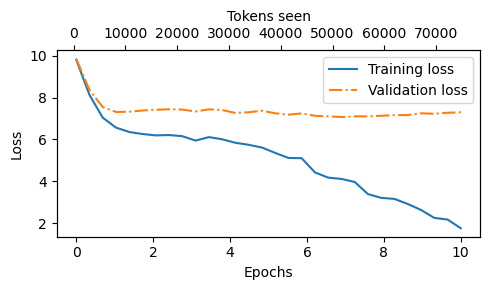

In [16]:
torch.save(model.state_dict(), "model.pth")
print("model saved")

from supplementary import plot_losses

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

Exercise 1: Generate text from the pretrained LLM
Use the model to generate new text (HINT: scroll up to see how we generated text before)




Exercise 2: Load the pretrained model in a new session
Open a new Python session or Jupyter notebook and load the model there

In [17]:
# Exercise 1 - generate text from the trained model
# model should produce much better output now compared to step 2

model.eval()

start_context = "Every effort moves you"

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=50,
    context_size=GPT_CONFIG_124M["context_length"]
)

print(token_ids_to_text(token_ids, tokenizer))

Every effort moves you
the and the daughter of a

dismissed me, the most
of science, and that rude hand.
was deeply grieved by his retreat in these unfortunate circumstances.
sister, and the false pride which led to


In [18]:
# Exercise 2 - loading the model back in from the saved file
# this simulates opening a fresh session and picking up where we left off

import torch
import tiktoken
from supplementary import GPTModel, generate_text_simple

GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

# build a fresh model with the same config
model_loaded = GPTModel(GPT_CONFIG_124M)

# load the weights we saved earlier
model_loaded.load_state_dict(torch.load("model.pth"))
model_loaded.eval()

tokenizer = tiktoken.get_encoding("gpt2")

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0)
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"

token_ids = generate_text_simple(
    model=model_loaded,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=50,
    context_size=GPT_CONFIG_124M["context_length"]
)

print(token_ids_to_text(token_ids, tokenizer))

C:\Users\STA\AppData\Local\Temp\ipykernel_3644\1596179488.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_loaded.load_state_dict(torch.load("model.pth"))


Every effort moves you
the and the daughter of a

dismissed me, the most
of science, and that rude hand.
was deeply grieved by his retreat in these unfortunate circumstances.
sister, and the false pride which led to
